In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split as tts
from sklearn.metrics import accuracy_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

# Load data

In [2]:
pip install openpyxl


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("insurance.xlsx")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Using label encoding

In [5]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])
        

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
x = df.drop("charges", axis=1)
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [8]:
y = df[["charges"]]
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [9]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size=0.3, random_state=42)

# Linear Regression

In [10]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)
lr_pred = lr.predict(xtest)

In [11]:
lr_accuracy = lr.score(xtest, ytest)
lr_accuracy

0.7694415927057693

In [12]:
lr_mse = mean_squared_error(ytest, lr_pred)
lr_mse

33805466.898688614

In [13]:
lr_mae = mean_absolute_error(ytest, lr_pred)
lr_mae

4155.23984305938

# KNN Regression

In [14]:
knn = KNeighborsRegressor()  
knn.fit(xtrain, ytrain)
knn_pred = knn.predict(xtest)

In [15]:
knn_accuracy = knn.score(xtest, ytest)
knn_accuracy 

0.1329207564887055

In [16]:
knn_mse = mean_squared_error(ytest, knn_pred)
knn_mse

127134893.96920598

In [17]:
knn_mae = mean_absolute_error(ytest, knn_pred)
knn_mae

7846.763836032338

# Bar plot

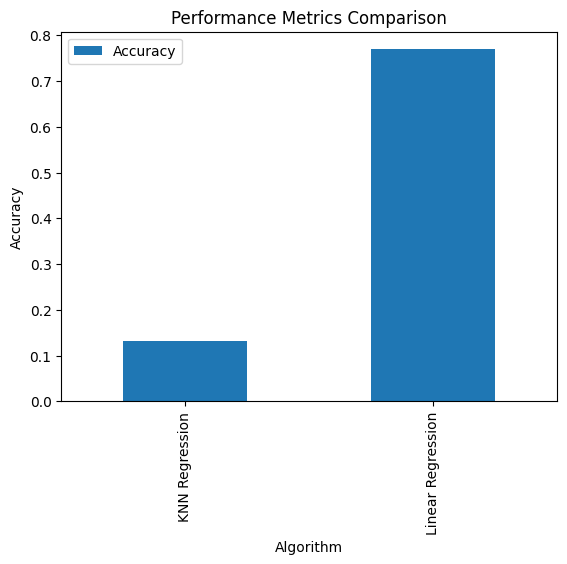

In [35]:
results = pd.DataFrame({
    "Algorithm": [ "KNN Regression", "Linear Regression"],
    "Accuracy": [knn_accuracy, lr_accuracy]})

results.plot(x="Algorithm", y="Accuracy", kind="bar")
plt.title("Performance Metrics Comparison")
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.show()
   

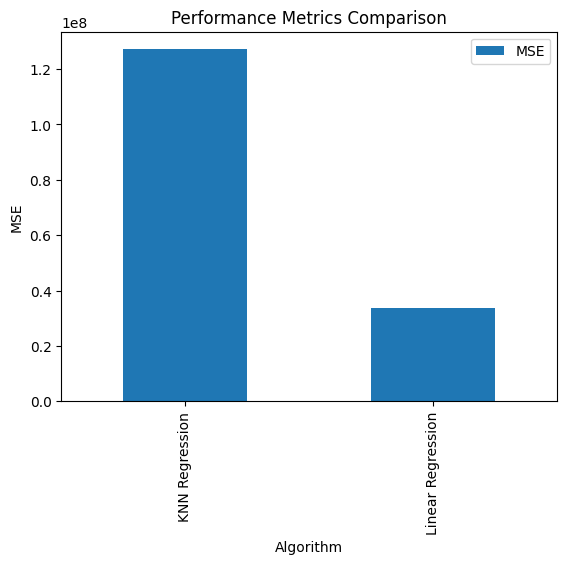

In [37]:
results = pd.DataFrame({
    "Algorithm": [ "KNN Regression", "Linear Regression"],
    "MSE": [knn_mse, lr_mse]})

results.plot(x="Algorithm", y="MSE", kind="bar")
plt.title("Performance Metrics Comparison")
plt.xlabel("Algorithm")
plt.ylabel("MSE")
plt.show()

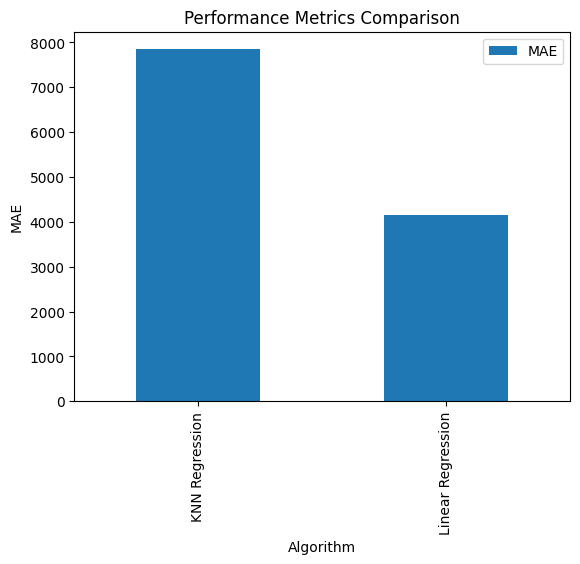

In [38]:
results = pd.DataFrame({
    "Algorithm": [ "KNN Regression", "Linear Regression"],
    "MAE": [knn_mae, lr_mae]})

results.plot(x="Algorithm", y="MAE", kind="bar")
plt.title("Performance Metrics Comparison")
plt.xlabel("Algorithm")
plt.ylabel("MAE")
plt.show()